In [1]:
import random
import os
import h5py
import numpy as np
from work.dataset.activitynet import ActivityNetDataset

dataset = ActivityNetDataset(
    videos_path='../../../../../dataset/videos.json',
    labels_path='../../../../../dataset/labels.txt'
)
videos = dataset.get_subset_videos('validation')
videos = random.sample(videos, 8)

In [3]:
experiment = 6
nb_epoch = 150

predictions_file = '../predictions/predictions_{experiment:02d}_e{nb_epoch:03d}.hdf5'.format(
    experiment=experiment, nb_epoch=nb_epoch)
predictions_dataset = h5py.File(predictions_file, 'r')['validation']

predictions = []
for v in videos:
    prediction = predictions_dataset[v.video_id][...]
    predictions.append((v, prediction))

Video ID: Mpph0kFsyZ0
Main Activity: Shot put


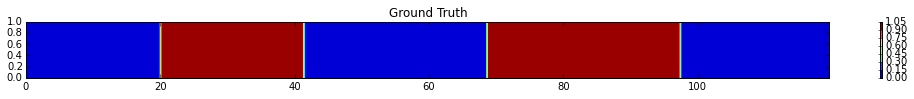

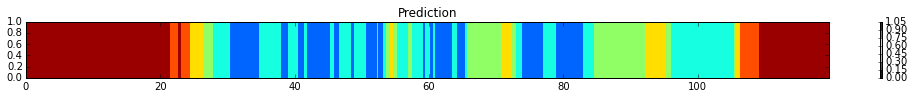



Video ID: ubNDaGOws0E
Main Activity: Cumbia


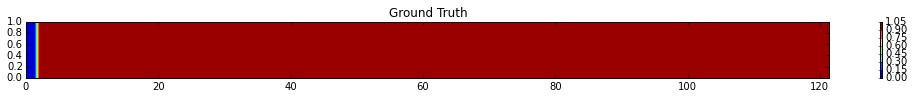

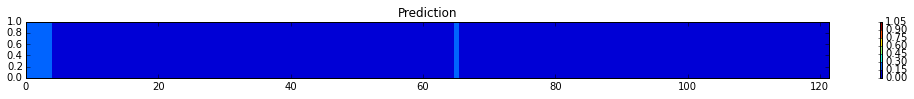



Video ID: mIC02-VKqUE
Main Activity: Rock-paper-scissors


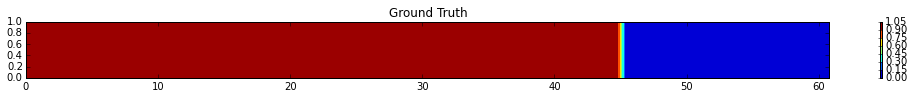

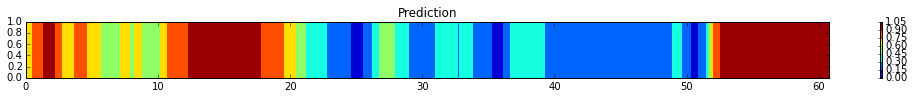



Video ID: Lf3oTCD4d08
Main Activity: Ironing clothes


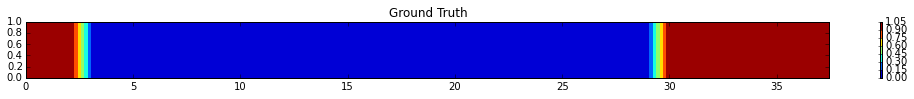

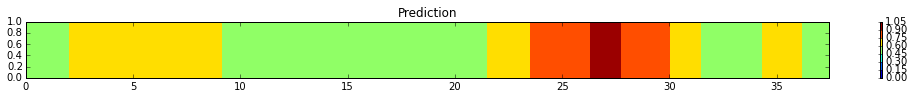



Video ID: lKSlIMfWZXI
Main Activity: Washing dishes


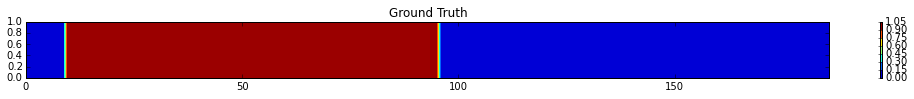

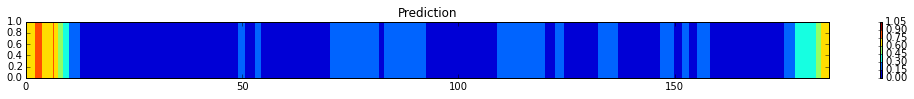



Video ID: hryx3zm06U8
Main Activity: Laying tile


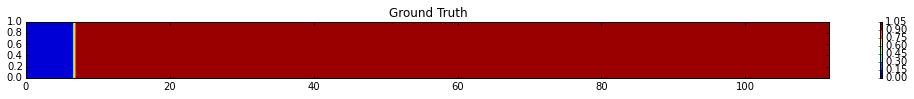

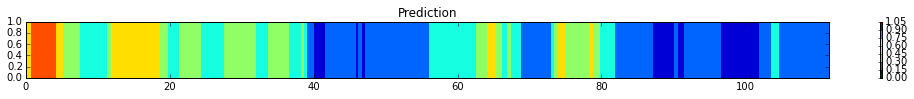



Video ID: uE9MHR27_gc
Main Activity: Sharpening knives


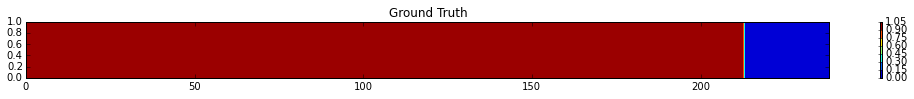

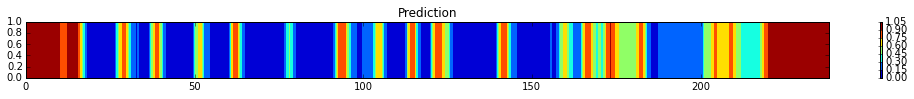



Video ID: LIJBolW8k5o
Main Activity: Windsurfing


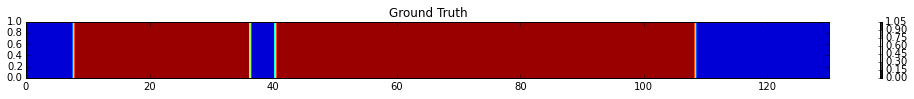

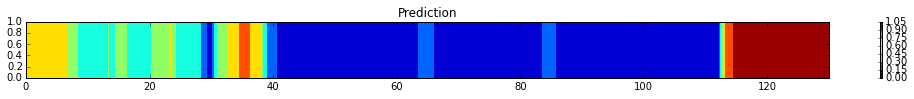

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import matplotlib
normalize = matplotlib.colors.Normalize(vmin=0, vmax=1)

for v, prediction in predictions:
    v.get_video_instances(16, 0)
    nb_instances = len(v.instances)
    ground_truth = np.zeros(nb_instances)
    ground_truth_aux = np.array([instance.output for instance in v.instances])
    ground_truth[ground_truth_aux != 0] = 1
    x = np.arange(nb_instances)*16/v.fps
    y = np.array([0,1])
    print('Video ID: {}\nMain Activity: {}'.format(v.video_id, v.label))
    plt.figure(num=None, figsize=(18, 1), dpi=100)
    cs = plt.contourf(x, y, np.broadcast_to(ground_truth, (2, nb_instances)), zorder=1, cmap=cm.jet, vmin=0, vmax=1)
    plt.title('Ground Truth')
    plt.colorbar(cs)
    plt.show()
    
    plt.figure(num=None, figsize=(18, 1), dpi=100)
    plt.contourf(x, y, np.broadcast_to(prediction, (2, nb_instances)), zorder=1, cmap=cm.jet, vmin=0, vmax=1, levels=cs.levels)
    plt.title('Prediction')
    plt.colorbar()
    plt.show()
    
    print('\n')